In [18]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import random

In [19]:
info_df = pd.read_csv("../../data/data_info.csv")
strong_imbalance = info_df.loc[info_df["imbalance"] <= 0.21, "name"]
weak_imbalance = info_df.loc[info_df["imbalance"] > 0.21, "name"]

In [20]:
results = get_all_results('experiment5')
results = results.loc[results['dataset_name'] != 'musk']

In [21]:
# results = results.sort_values('test.f1_score', ascending=False)
# results['rank'] = results.groupby('dataset_name')['test.f1_score'].rank(ascending=False)

In [22]:
settings = results[['config_id', 'name']].drop_duplicates().sort_values('config_id')
settings['config_settings'] = settings['name']
settings = settings[['config_id', 'config_settings']]
settings
results = results.merge(settings, on='config_id')
results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,GSGP,False,200,500,True,1,6,rhh,...,0.503311,0.426966,0.612903,0.706667,0.641434,0.476191,0.416667,0.555556,blood,GSGP
1,1,2,GSGP,False,200,500,True,1,6,rhh,...,0.488599,0.409836,0.604839,0.733333,0.734135,0.538462,0.460526,0.648148,blood,GSGP
2,1,3,GSGP,False,200,500,True,1,6,rhh,...,0.607843,0.510989,0.750000,0.666667,0.636777,0.390244,0.347826,0.444444,blood,GSGP
3,1,4,GSGP,False,200,500,True,1,6,rhh,...,0.567568,0.488372,0.677419,0.666667,0.687135,0.436090,0.367089,0.537037,blood,GSGP
4,1,5,GSGP,False,200,500,True,1,6,rhh,...,0.551136,0.425439,0.782258,0.595556,0.674681,0.455090,0.336283,0.703704,blood,GSGP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5,6,SLIM+SIG2,False,200,500,True,1,6,rhh,...,0.659259,0.526627,0.881188,0.567308,0.646970,0.608696,0.492958,0.795455,liver,SLIM+SIG2
446,5,7,SLIM+SIG2,False,200,500,True,1,6,rhh,...,0.674074,0.538462,0.900990,0.557692,0.651894,0.603448,0.486111,0.795455,liver,SLIM+SIG2
447,5,8,SLIM+SIG2,False,200,500,True,1,6,rhh,...,0.671815,0.550633,0.861386,0.625000,0.729167,0.666667,0.534247,0.886364,liver,SLIM+SIG2
448,5,9,SLIM+SIG2,False,200,500,True,1,6,rhh,...,0.671533,0.531792,0.910891,0.557692,0.601136,0.596491,0.485714,0.772727,liver,SLIM+SIG2


In [23]:
get_aggregated_performance(results, 'test.f1_score').loc['blood', 'GSGP']

0.48973857760429385

In [24]:
get_performance_difference_significance_table(results, 'GSGP', 'test.f1_score', pivot = True)

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


config1_v_config2,GSGP_VS_SLIM*SIG1,GSGP_VS_SLIM+ABS,GSGP_VS_SLIM+SIG1,GSGP_VS_SLIM+SIG2
dataset_name,,,,
blood,0.594 (≈),0.678 (≈),0.401 (≈),0.214 (≈)
clima,0.002 (+),0.625 (≈),0.049 (+),0.160 (≈)
eeg,0.008 (+),0.008 (+),0.037 (+),0.028 (+)
fertility,0.193 (≈),0.395 (≈),0.812 (≈),0.888 (≈)
gina,0.002 (+),0.232 (≈),0.275 (≈),0.004 (+)
hill,0.036 (+),0.260 (≈),0.038 (+),0.025 (+)
ilpd,0.375 (≈),0.594 (≈),0.767 (≈),0.922 (≈)
kc,0.160 (≈),1.000 (≈),0.922 (≈),0.846 (≈)
liver,0.139 (≈),0.953 (≈),0.695 (≈),1.000 (≈)


In [25]:
get_performance_difference_significance_table(results, 'GSGP', 'test.f1_score', pivot = False)

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,dataset_name,config1,config2,performance1,performance2,p_value,sign
0,blood,GSGP,SLIM+ABS,0.489739,0.495906,0.678402,≈
1,blood,GSGP,SLIM+SIG1,0.489739,0.485300,0.400814,≈
2,blood,GSGP,SLIM*SIG1,0.489739,0.497855,0.593955,≈
3,blood,GSGP,SLIM+SIG2,0.489739,0.502132,0.213524,≈
4,clima,GSGP,SLIM+ABS,0.597006,0.546938,0.625000,≈
5,clima,GSGP,SLIM+SIG1,0.597006,0.460510,0.048828,+
6,clima,GSGP,SLIM*SIG1,0.597006,0.238114,0.001953,+
7,clima,GSGP,SLIM+SIG2,0.597006,0.452019,0.160156,≈
8,eeg,GSGP,SLIM+ABS,0.652423,0.633546,0.007686,+
9,eeg,GSGP,SLIM+SIG1,0.652423,0.637884,0.037109,+


In [26]:
blood = results[results['dataset_name'] == 'blood']
blood

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,config_settings
0,1,1,GSGP,False,200,500,True,1,6,rhh,...,0.503311,0.426966,0.612903,0.706667,0.641434,0.476191,0.416667,0.555556,blood,GSGP
1,1,2,GSGP,False,200,500,True,1,6,rhh,...,0.488599,0.409836,0.604839,0.733333,0.734135,0.538462,0.460526,0.648148,blood,GSGP
2,1,3,GSGP,False,200,500,True,1,6,rhh,...,0.607843,0.510989,0.750000,0.666667,0.636777,0.390244,0.347826,0.444444,blood,GSGP
3,1,4,GSGP,False,200,500,True,1,6,rhh,...,0.567568,0.488372,0.677419,0.666667,0.687135,0.436090,0.367089,0.537037,blood,GSGP
4,1,5,GSGP,False,200,500,True,1,6,rhh,...,0.551136,0.425439,0.782258,0.595556,0.674681,0.455090,0.336283,0.703704,blood,GSGP
5,1,6,GSGP,False,200,500,True,1,6,rhh,...,0.558923,0.479769,0.669355,0.693333,0.726771,0.481203,0.405063,0.592593,blood,GSGP
6,1,7,GSGP,False,200,500,True,1,6,rhh,...,0.516129,0.430108,0.645161,0.693333,0.694499,0.517483,0.415730,0.685185,blood,GSGP
7,1,8,GSGP,False,200,500,True,1,6,rhh,...,0.503778,0.366300,0.806452,0.635556,0.797379,0.523256,0.381356,0.833333,blood,GSGP
8,1,9,GSGP,False,200,500,True,1,6,rhh,...,0.520900,0.433155,0.653226,0.724444,0.727204,0.523077,0.447368,0.629630,blood,GSGP
9,1,10,GSGP,False,200,500,True,1,6,rhh,...,0.518310,0.398268,0.741935,0.702222,0.726446,0.556291,0.432990,0.777778,blood,GSGP


In [27]:
get_avg_ranking(results, 'test.f1_score').set_index('config_settings')

,avg_rank
config_settings,
SLIM+ABS,2.000000
GSGP,2.333333
SLIM+SIG2,2.777778
SLIM+SIG1,3.666667
SLIM*SIG1,4.222222


In [28]:
min(get_avg_ranking(results, 'test.f1_score').set_index('config_settings').values.astype(int))

array([2])

(-10, 30)
(-20, -30)
(-20, 30)
(0, -30)
(0, 30)


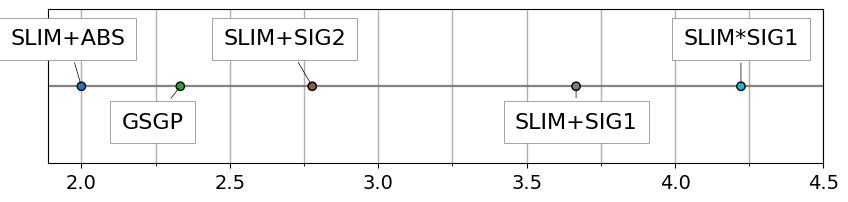

In [29]:
plot_rankings(get_avg_ranking(results, 'test.f1_score'))

In [30]:
get_ranking_significance(get_rankings(results.loc[results['dataset_name'] != 'musk'], 'test.f1_score'))

0.014894132369050817

In [31]:
results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.accuracy'].mean().unstack().mean(axis=1).sort_values(ascending=False).unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.681778,0.680444,0.676444,0.672000,0.691556
clima,0.932716,0.601235,0.911111,0.890741,0.900000
eeg,0.553293,0.485826,0.504673,0.516466,0.533890
fertility,0.816667,0.720000,0.810000,0.793333,0.823333
gina,0.774313,0.623784,0.764482,0.761628,0.724736
hill,0.710165,0.524176,0.632967,0.611813,0.617857
ilpd,0.597143,0.520000,0.609143,0.584571,0.592000
kc,0.788468,0.739021,0.772196,0.771564,0.772986
liver,0.603846,0.561538,0.579808,0.575000,0.582692


In [32]:
results.groupby(['dataset_name', 'config_settings'])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [33]:
get_aggregated_performance(results, 'test.f1_score').rank(axis=1, ascending=False, method='min')

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,4.0,2.0,3.0,5.0,1.0
clima,1.0,5.0,2.0,3.0,4.0
eeg,1.0,5.0,4.0,3.0,2.0
fertility,5.0,1.0,2.0,3.0,4.0
gina,1.0,5.0,2.0,3.0,4.0
hill,1.0,5.0,2.0,4.0,3.0
ilpd,3.0,5.0,1.0,4.0,2.0
kc,2.0,5.0,1.0,4.0,3.0
liver,3.0,5.0,1.0,4.0,2.0


In [34]:
get_ranks

NameError: name 'get_ranks' is not defined

In [ ]:
results.groupby(["dataset_name", "config_id"], as_index=False)['test.f1_score'].mean()

,dataset_name,config_id,test.f1_score
0,blood,1,0.489739
1,blood,2,0.495906
2,blood,3,0.485300
3,blood,4,0.497855
4,blood,5,0.502132
5,clima,1,0.597006
6,clima,2,0.546938
7,clima,3,0.460510
8,clima,4,0.238114
9,clima,5,0.452019


In [ ]:
get_rankings(results, 'test.f1_score')

,dataset_name,config_id,test.f1_score,rank
0,blood,1,0.489739,4.0
1,blood,2,0.495906,3.0
2,blood,3,0.485300,5.0
3,blood,4,0.497855,2.0
4,blood,5,0.502132,1.0
5,clima,1,0.597006,1.0
6,clima,2,0.546938,2.0
7,clima,3,0.460510,3.0
8,clima,4,0.238114,5.0
9,clima,5,0.452019,4.0


In [ ]:
results.groupby(['dataset_name', 'config_id', 'run_id'])['test.roc_auc'].mean().unstack().mean(axis=1).sort_values(ascending=False).unstack()

config_id,1,2,3,4,5
dataset_name,,,,,
blood,0.704646,0.713721,0.713840,0.700130,0.720695
clima,0.930792,0.888127,0.849710,0.699903,0.857819
eeg,0.620378,0.578697,0.590683,0.556187,0.610245
fertility,0.527885,0.601923,0.579808,0.646154,0.553846
gina,0.804494,0.791544,0.780960,0.635900,0.738208
hill,0.733513,0.645610,0.645598,0.536001,0.657209
ilpd,0.701488,0.706544,0.696112,0.677392,0.698128
kc,0.743076,0.763529,0.707730,0.711905,0.732695
liver,0.644545,0.645417,0.646970,0.607500,0.657197


In [ ]:
logs = get_all_logs('experiment4')
logs

,config_id,algorithm,dataset,seed,generation,elite_train_error,time,population_nodes,elite_test_error,elite_nodes,log_level
0,1,GSGP,blood,1,1,0.488119,0.035235,1674.0,0.541657,13,1
1,1,GSGP,blood,1,2,0.487492,0.040060,2110.0,0.538053,19,1
2,1,GSGP,blood,1,3,0.476080,0.034311,2476.0,0.447111,27,1
3,1,GSGP,blood,1,4,0.476010,0.034666,3212.0,0.483274,25,1
4,1,GSGP,blood,1,5,0.473637,0.038076,3612.0,0.513860,33,1
...,...,...,...,...,...,...,...,...,...,...,...
180283,4,SLIM+SIG2,spect,5,496,0.372243,0.011628,6319.0,0.378436,128,1
180284,4,SLIM+SIG2,spect,5,497,0.372243,0.010888,5601.0,0.378436,128,1
180285,4,SLIM+SIG2,spect,5,498,0.372243,0.011301,5199.0,0.378436,128,1
180286,4,SLIM+SIG2,spect,5,499,0.372243,0.010002,5121.0,0.378436,128,1


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.accuracy'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.681778,0.680444,0.676444,0.672000,0.691556
clima,0.932716,0.601235,0.911111,0.890741,0.900000
eeg,0.553293,0.485826,0.504673,0.516466,0.533890
fertility,0.816667,0.720000,0.810000,0.793333,0.823333
gina,0.774313,0.623784,0.764482,0.761628,0.724736
hill,0.710165,0.524176,0.632967,0.611813,0.617857
ilpd,0.597143,0.520000,0.609143,0.584571,0.592000
kc,0.788468,0.739021,0.772196,0.771564,0.772986
liver,0.603846,0.561538,0.579808,0.575000,0.582692


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [ ]:
results.groupby(['dataset_name', 'config_settings'])['test.roc_auc'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.704646,0.700130,0.713721,0.713840,0.720695
clima,0.930792,0.699903,0.888127,0.849710,0.857819
eeg,0.620378,0.556187,0.578697,0.590683,0.610245
fertility,0.527885,0.646154,0.601923,0.579808,0.553846
gina,0.804494,0.635900,0.791544,0.780960,0.738208
hill,0.733513,0.536001,0.645610,0.645598,0.657209
ilpd,0.701488,0.677392,0.706544,0.696112,0.698128
kc,0.743076,0.711905,0.763529,0.707730,0.732695
liver,0.644545,0.607500,0.645417,0.646970,0.657197


In [ ]:
results.groupby(["dataset_name", "config_settings"])['test.f1_score'].mean().unstack()

config_settings,GSGP,SLIM*SIG1,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,
blood,0.489739,0.497855,0.495906,0.485300,0.502132
clima,0.597006,0.238114,0.546938,0.460510,0.452019
eeg,0.652423,0.626044,0.633546,0.637884,0.643573
fertility,0.148333,0.289232,0.226111,0.178547,0.161905
gina,0.800919,0.681503,0.788749,0.788321,0.766026
hill,0.753685,0.666061,0.712752,0.685834,0.689433
ilpd,0.520246,0.514833,0.527315,0.519750,0.521250
kc,0.438315,0.424623,0.439986,0.431447,0.437361
liver,0.601610,0.583086,0.602264,0.598363,0.602227


In [ ]:
ana = Analysis('experiment5')
ranks = ana.get_ranks_by_metric()
ranks['test.accuracy'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
2,4.0,2.0,4.0,3.0,2.0,2.0,1.0,3.0,3.0,NaN
3,5.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,NaN
4,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
5,1.0,3.0,2.0,1.0,4.0,3.0,3.0,2.0,2.0,NaN


In [ ]:
ranks

{'test.accuracy':    dataset_name  config_id  test.accuracy  rank
 0         blood          1       0.681778   2.0
 1         blood          2       0.676444   4.0
 2         blood          3       0.672000   5.0
 3         blood          4       0.680444   3.0
 4         blood          5       0.691556   1.0
 5         clima          1       0.932716   1.0
 6         clima          2       0.911111   2.0
 7         clima          3       0.890741   4.0
 8         clima          4       0.601235   5.0
 9         clima          5       0.900000   3.0
 10          eeg          1       0.553293   1.0
 11          eeg          2       0.504673   4.0
 12          eeg          3       0.516466   3.0
 13          eeg          4       0.485826   5.0
 14          eeg          5       0.533890   2.0
 15    fertility          1       0.816667   2.0
 16    fertility          2       0.810000   3.0
 17    fertility          3       0.793333   4.0
 18    fertility          4       0.720000   5.0
 19

In [ ]:
ranks['test.f1_score']

,dataset_name,config_id,test.f1_score,rank
0,blood,1,0.489739,4.0
1,blood,2,0.495906,3.0
2,blood,3,0.485300,5.0
3,blood,4,0.497855,2.0
4,blood,5,0.502132,1.0
5,clima,1,0.597006,1.0
6,clima,2,0.546938,2.0
7,clima,3,0.460510,3.0
8,clima,4,0.238114,5.0
9,clima,5,0.452019,4.0


In [ ]:
ranks['test.f1_score'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,4.0,1.0,1.0,5.0,1.0,1.0,3.0,2.0,3.0,1.0
2,3.0,2.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN
3,5.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,NaN
4,2.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,NaN
5,1.0,4.0,2.0,4.0,4.0,3.0,2.0,3.0,2.0,NaN


In [ ]:
ranks['test.roc_auc'].groupby(['config_id', 'dataset_name'])['rank'].mean().unstack()

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk
config_id,,,,,,,,,,
1,4.0,1.0,1.0,5.0,1.0,1.0,2.0,2.0,4.0,1.0
2,3.0,2.0,4.0,2.0,2.0,3.0,1.0,1.0,3.0,NaN
3,2.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,NaN
4,5.0,5.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,NaN
5,1.0,3.0,2.0,4.0,4.0,2.0,3.0,3.0,1.0,NaN


In [ ]:
ranks['test.accuracy'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.300000
1,2,2.666667
2,3,3.888889
3,4,4.777778
4,5,2.333333


In [ ]:
ranks['test.f1_score'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.200000
1,2,2.000000
2,3,3.666667
3,4,4.222222
4,5,2.777778


In [ ]:
ranks['test.roc_auc'].groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.200000
1,2,2.333333
2,3,3.333333
3,4,4.444444
4,5,2.555556


In [ ]:
ranks_strong_imbalance = ranks['test.accuracy'].loc[ranks['test.accuracy']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.accuracy'].loc[ranks['test.accuracy']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.333333
1,2,2.666667
2,3,4.000000
3,4,5.000000
4,5,2.000000


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,1.285714
1,2,2.666667
2,3,3.833333
3,4,4.666667
4,5,2.500000


In [ ]:
ranks_strong_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.666667
1,2,1.666667
2,3,3.333333
3,4,3.666667
4,5,3.666667


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.000000
1,2,2.166667
2,3,3.833333
3,4,4.500000
4,5,2.333333


In [ ]:
ranks_strong_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.666667
1,2,1.666667
2,3,4.000000
3,4,3.333333
4,5,3.333333


In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

,config_id,rank
0,1,2.000000
1,2,2.666667
2,3,3.000000
3,4,5.000000
4,5,2.166667
